In [15]:
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


Question 1 (a)

In [16]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images to a 0-1 range
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [17]:
# Create a Sequential model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])


In [18]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_images, test_labels), verbose=2)
end_time = time.time()


Epoch 1/10
98/98 - 2s - loss: 3.0258 - accuracy: 0.2109 - val_loss: 2.0902 - val_accuracy: 0.2767 - 2s/epoch - 17ms/step
Epoch 2/10
98/98 - 1s - loss: 2.0081 - accuracy: 0.2851 - val_loss: 1.9294 - val_accuracy: 0.3193 - 848ms/epoch - 9ms/step
Epoch 3/10
98/98 - 1s - loss: 1.9055 - accuracy: 0.3190 - val_loss: 1.8520 - val_accuracy: 0.3379 - 843ms/epoch - 9ms/step
Epoch 4/10
98/98 - 1s - loss: 1.8348 - accuracy: 0.3439 - val_loss: 1.8778 - val_accuracy: 0.3217 - 784ms/epoch - 8ms/step
Epoch 5/10
98/98 - 1s - loss: 1.7861 - accuracy: 0.3620 - val_loss: 1.7807 - val_accuracy: 0.3604 - 659ms/epoch - 7ms/step
Epoch 6/10
98/98 - 1s - loss: 1.7471 - accuracy: 0.3773 - val_loss: 1.7536 - val_accuracy: 0.3837 - 657ms/epoch - 7ms/step
Epoch 7/10
98/98 - 1s - loss: 1.7135 - accuracy: 0.3925 - val_loss: 1.6994 - val_accuracy: 0.3925 - 633ms/epoch - 6ms/step
Epoch 8/10
98/98 - 1s - loss: 1.6889 - accuracy: 0.4011 - val_loss: 1.6795 - val_accuracy: 0.3940 - 679ms/epoch - 7ms/step
Epoch 9/10
98/98 -

In [20]:
# Calculate and print the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Get the final training loss
final_loss = history.history['loss'][-1]
print(f"Final training loss: {final_loss:.4f}")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Training time: 12.25 seconds
Final training loss: 1.6418
Test accuracy: 43.45%


Question 1 (b)

In [21]:
# Create a Sequential model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')
])


In [22]:
model.compile(optimizer=RMSprop(lr=0.0005),  # Adjusted learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=300, batch_size=512,
                    validation_data=(test_images, test_labels), verbose=2)
end_time = time.time()


Epoch 1/300
98/98 - 2s - loss: 2.5081 - accuracy: 0.1923 - val_loss: 2.1880 - val_accuracy: 0.2292 - 2s/epoch - 23ms/step
Epoch 2/300
98/98 - 1s - loss: 1.9780 - accuracy: 0.2863 - val_loss: 1.8998 - val_accuracy: 0.3061 - 1s/epoch - 11ms/step
Epoch 3/300
98/98 - 1s - loss: 1.8747 - accuracy: 0.3247 - val_loss: 1.7648 - val_accuracy: 0.3641 - 911ms/epoch - 9ms/step
Epoch 4/300
98/98 - 1s - loss: 1.7996 - accuracy: 0.3568 - val_loss: 1.7623 - val_accuracy: 0.3657 - 873ms/epoch - 9ms/step
Epoch 5/300
98/98 - 1s - loss: 1.7426 - accuracy: 0.3742 - val_loss: 1.6684 - val_accuracy: 0.4020 - 708ms/epoch - 7ms/step
Epoch 6/300
98/98 - 1s - loss: 1.7103 - accuracy: 0.3877 - val_loss: 1.6295 - val_accuracy: 0.4109 - 724ms/epoch - 7ms/step
Epoch 7/300
98/98 - 1s - loss: 1.6775 - accuracy: 0.4000 - val_loss: 1.6143 - val_accuracy: 0.4243 - 654ms/epoch - 7ms/step
Epoch 8/300
98/98 - 1s - loss: 1.6370 - accuracy: 0.4168 - val_loss: 1.6314 - val_accuracy: 0.4180 - 640ms/epoch - 7ms/step
Epoch 9/300


In [24]:
# Calculate and print the training time
training_time = end_time - start_time
print(f"Training time: {training_time / 60:.2f} minutes")  # Convert to minutes for better readability

# Get the final training loss
final_loss = history.history['loss'][-1]
print(f"Final training loss: {final_loss:.4f}")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Training time: 4.40 minutes
Final training loss: 0.1901
Test accuracy: 48.91%


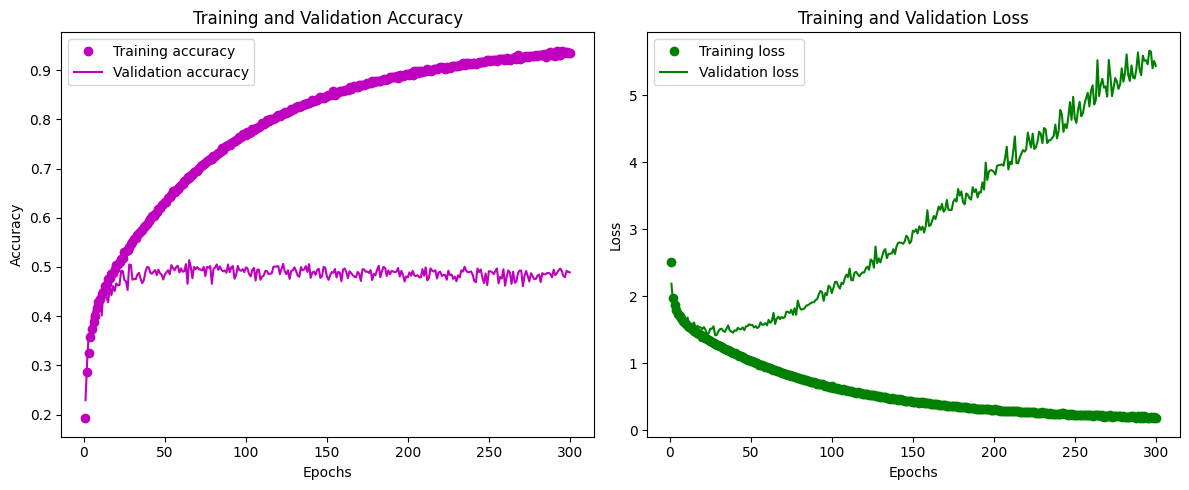

In [26]:
# Plot training and validation accuracy
epochs = range(1, 301)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'mo', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'm', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'go', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
